## Analysis of S&P500 for Significant Gain or Drop

## Part 1 
#### Clean up s&p500 data and divide them into green/red & before/after May

In [1]:
# import modules/ file path
import pandas as pd
import numpy as numpy 
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
sp500filepath=("../project data/indexes/^SP500.Last.txt")


In [2]:
# Read csv, Add a column 'change' and 'percent_change'. add column 'Date_dt' for datetime conversion
sp500df=pd.read_csv(sp500filepath,delimiter=';',header=None,names=['Date','Open','High','Low','Close','Volume'])
sp500df.drop(labels='Volume',axis=1,inplace=True)
sp500df['Change']=sp500df['Close']-sp500df['Open']
sp500df['Percent_Change']=sp500df['Change']/sp500df['Open']*100
sp500df['Date_dt']=pd.to_datetime(sp500df['Date'],format='%Y%m%d')
sp500df['Date']=sp500df['Date'].astype('str')
sp500df.head()

,Date,Open,High,Low,Close,Change,Percent_Change,Date_dt
0,20200203,3235.66,3268.44,3235.66,3248.92,13.26,0.409808,2020-02-03
1,20200204,3280.61,3306.92,3280.61,3297.59,16.98,0.517587,2020-02-04
2,20200205,3324.91,3337.58,3313.75,3334.69,9.78,0.294143,2020-02-05
3,20200206,3344.92,3347.96,3334.39,3345.78,0.86,0.025711,2020-02-06
4,20200207,3335.54,3341.42,3322.12,3327.71,-7.83,-0.234745,2020-02-07


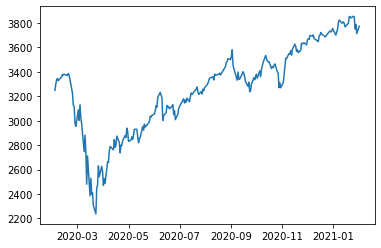

In [3]:
# quick end of day graph
plt.plot(sp500df['Date_dt'],sp500df['Close'])

<AxesSubplot:>

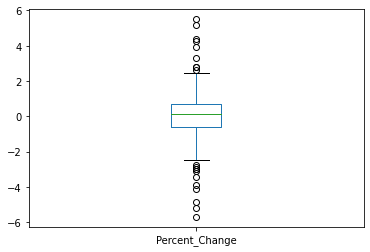

In [4]:
# quick percent change outlier visualization
sp500df['Percent_Change'].plot(kind='box')

In [5]:
# Calculate Quantiles/ IQR 

spdfQT=sp500df['Percent_Change'].quantile([.25,.5,.75])
spIQR=spdfQT[.75]-spdfQT[.25]
spUpBd=spdfQT[.75]+spIQR
spLwBd=spdfQT[.25]-spIQR
print(f'Upper Bound is {spUpBd}, and Lower Bound is {spLwBd}')

# Select Outlier Data into a new Dataframe

spOUT=sp500df.loc[(sp500df['Percent_Change'] < spLwBd) | (sp500df['Percent_Change'] > spUpBd)]
print(spOUT.shape)


Upper Bound is 1.9887252389411838, and Lower Bound is -1.9177555348614888
(32, 8)


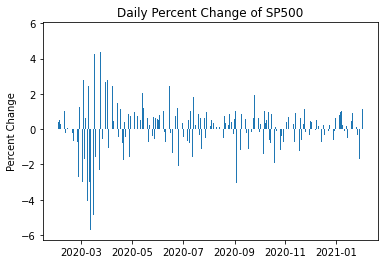

In [6]:
# take a look at just the percent change
plt.bar(sp500df['Date_dt'],sp500df['Percent_Change'])
plt.title('Daily Percent Change of SP500')
plt.ylabel('Percent Change')
plt.savefig('DailyPercent.png',dpi=600)
plt.show()


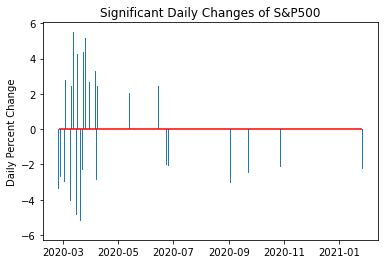

In [7]:
# visualize only the outliers
plt.bar(spOUT['Date_dt'],spOUT['Percent_Change'])
plt.title('Significant Daily Changes of S&P500')
plt.ylabel('Daily Percent Change')
plt.hlines(y=0,xmin=spOUT['Date_dt'].min(),xmax=spOUT['Date_dt'].max(),color='r')
plt.savefig('Outliers.png',dpi=600)
plt.show()

In [8]:
# Seperate into before/after May
sp5df=sp500df.loc[sp500df['Date_dt']>'2020-05']
sp25df=sp500df.loc[sp500df['Date_dt']<'2020-05']

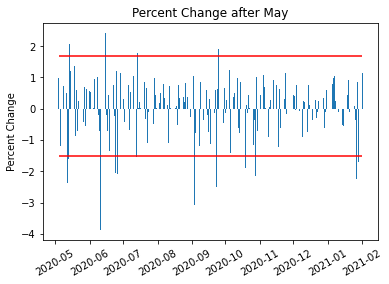

In [9]:
# Visualize Percent Change After May
plt.bar(sp5df['Date_dt'],sp5df['Percent_Change'])

plt.hlines(y=(1.7,-1.5),xmin=sp5df['Date_dt'].min(),xmax=sp5df['Date_dt'].max(),color='r')
plt.title('Percent Change after May')
plt.ylabel('Percent Change')
plt.xticks(rotation=30)
plt.savefig('PchangeAfterMay.png',dpi=600)
plt.show()


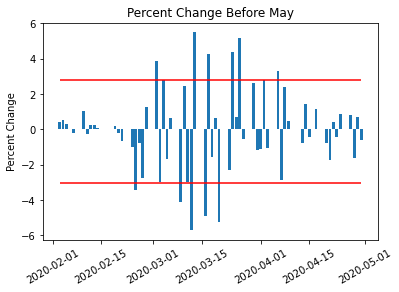

In [10]:
plt.bar(sp25df['Date_dt'],sp25df['Percent_Change'])
plt.xticks(rotation=30)
plt.title('Percent Change Before May')
plt.hlines(y=(2.79,-3.02),xmin=sp25df['Date_dt'].min(),xmax=sp25df['Date_dt'].max(),color='r')
plt.ylabel('Percent Change')
plt.savefig('PChangeBeforeMay.png',dpi=600)
plt.show()


In [11]:
# Calculate Quantiles/ IQR after May 

sp5dfQT=sp5df['Percent_Change'].quantile([.25,.5,.75])
sp5IQR=sp5dfQT[.75]-sp5dfQT[.25]
sp5UpBd=sp5dfQT[.75]+sp5IQR
sp5LwBd=sp5dfQT[.25]-sp5IQR
print(f'Upper Bound is {sp5UpBd}, and Lower Bound is {sp5LwBd}')

# Select Outlier Data into a new Dataframe

sp5OUT=sp5df.loc[(sp5df['Percent_Change'] < sp5LwBd) | (sp5df['Percent_Change'] > sp5UpBd)]
print(sp5OUT.shape)

Upper Bound is 1.7013427315795473, and Lower Bound is -1.5010320941174282
(18, 8)


In [12]:
# Number of Green vs Red days after May
sp5Green=sp5OUT.loc[sp5OUT['Percent_Change'] > 0].sort_values(by='Percent_Change',ascending=False)
sp5Red=sp5OUT.loc[sp5OUT['Percent_Change'] < 0].sort_values(by='Percent_Change',ascending=True)
print(f'There are {sp5Green.shape[0]} Really Green Days after May, and there are {sp5Red.shape[0]} Really Red Days After May')

There are 4 Really Green Days after May, and there are 14 Really Red Days After May


In [13]:
# Calculate Quantiles/ IQR Before May 

sp25dfQT=sp25df['Percent_Change'].quantile([.25,.5,.75])
sp25IQR=sp25dfQT[.75]-sp25dfQT[.25]
sp25UpBd=sp25dfQT[.75]+sp25IQR
sp25LwBd=sp25dfQT[.25]-sp25IQR
print(f'Upper Bound is {sp25UpBd}, and Lower Bound is {sp25LwBd}')

# Select Outlier Data into a new Dataframe

sp25OUT=sp25df.loc[(sp25df['Percent_Change'] < sp25LwBd) | (sp25df['Percent_Change'] > sp25UpBd)]
print(sp25OUT.shape)

Upper Bound is 2.7918359666123838, and Lower Bound is -3.0296841419243954
(11, 8)


In [14]:
# Number of Green vs Red days before May
sp25Green=sp25OUT.loc[sp25OUT['Percent_Change'] > 0].sort_values(by='Percent_Change',ascending=False)
sp25Red=sp25OUT.loc[sp25OUT['Percent_Change'] < 0].sort_values(by='Percent_Change',ascending=True)
print(f'There are {sp25Green.shape[0]} Really Green Days Before May, and there are {sp25Red.shape[0]} Really Red Days Before May')

There are 6 Really Green Days Before May, and there are 5 Really Red Days Before May


## Part 2
### I separated the green/red days for before/after May, I use NYT article search api to retrieve articles from those dates, and use wordcloud to visualize the content

In [15]:
import requests
import json
import nltk
from config import api_key
from bs4 import BeautifulSoup
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Signficant Market Drops After May

In [16]:
# retrieve article url from those days
url='https://api.nytimes.com/svc/search/v2/articlesearch.json?'

red5urls=[]
for x in sp5Red['Date']:
    begin=x
    end=x
    q_url=url + "api-key=" + api_key + "&q=stock market"+"&begin_date="+ begin + "&end_date=" + end + "&sort=relevance"
    response=requests.get(q_url).json()
    
    for y in range(0,10) :
        try :
            red5urls.append(response['response']['docs'][y]['web_url'])
        except: 
            continue

In [17]:
# save the results
urlRed5df=pd.DataFrame({'Red5':red5urls})
urlRed5df.to_csv('urlRed5df.csv')

In [18]:
# scrape the page for actual article content
content=[]
for u in red5urls:
    response=requests.get(u)
    soup = BeautifulSoup(response.content, 'html.parser')
   
    for s in soup.find_all(class_='css-axufdj evys1bk0'):
        content.append(s.text)
     
    

In [19]:
# prepare for wordcloud
text=" ".join(content)
token=word_tokenize(text)
token=[t.lower() for t in token]
token = [t for t in token if t not in stopwords.words('english')]
token = [t for t in token if t.isalpha()]

cleant=" ".join(token)

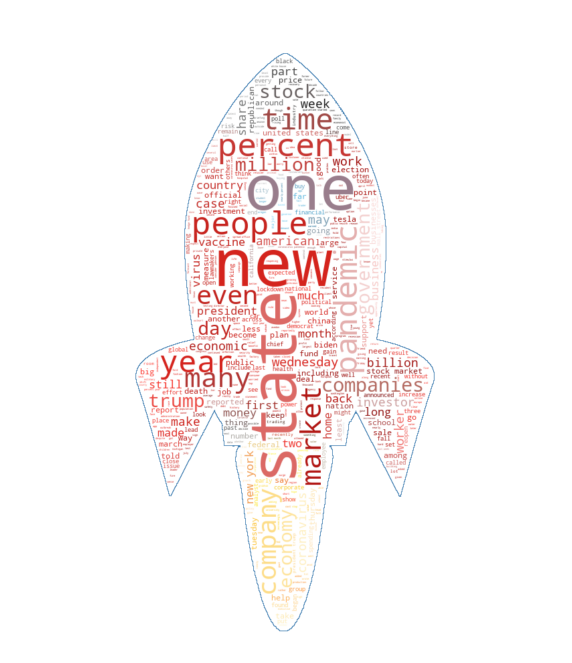

In [20]:
# masked wordcloud
mask=numpy.array(Image.open("rocket.png"))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=500, mask=mask,
               stopwords=stopwords, contour_width=1, contour_color='steelblue')
wc.generate(cleant)
image_colors = ImageColorGenerator(mask)


plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('AfterMayRed.png')

### Signficant Market Drops Before May

In [27]:
# Retrieve article urls
url='https://api.nytimes.com/svc/search/v2/articlesearch.json?'
red25urls=[]
for x in sp25Red['Date']:
    begin=x
    end=x
    q_url=url + "api-key=" + api_key + "&q=stock market"+"&begin_date="+ begin + "&end_date=" + end + "&sort=relevance"
    response=requests.get(q_url).json()
    
    for y in range(0,10) :
        try :
            red25urls.append(response['response']['docs'][y]['web_url'])
        except: 
            continue
            
            
urlred25df=pd.DataFrame({'urlred25':red25urls})
urlred25df.to_csv('urlred25df.csv')

In [29]:
# scrape for article content
content1=[]
for u in red25urls:
    response=requests.get(u)
    soup = BeautifulSoup(response.content, 'html.parser')
   
    for s in soup.find_all(class_='css-axufdj evys1bk0'):
        content1.append(s.text)
     
    

In [34]:
# clean up for wordcloud
text1=" ".join(content1)
token1=word_tokenize(text1)
token1=[t.lower() for t in token1]
token1 = [t for t in token1 if t not in stopwords.words('english')]
token1 = [t for t in token1 if t.isalpha()]

cleant1=" ".join(token1)

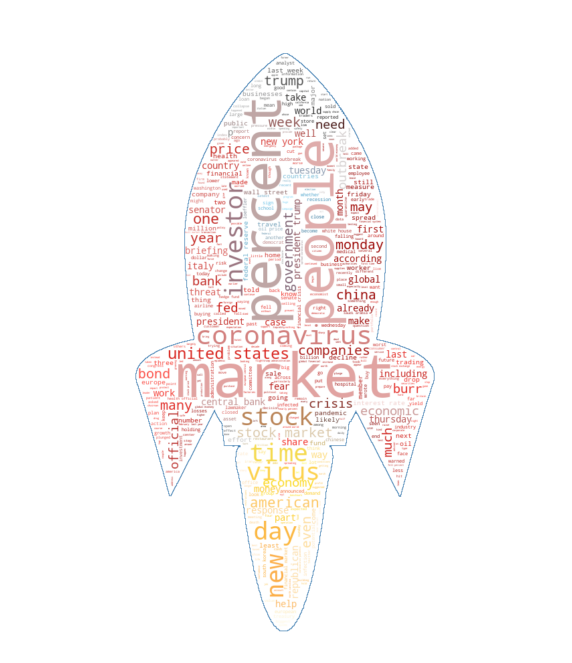

In [35]:
# wordcloud
mask=numpy.array(Image.open("rocket.png"))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=500, mask=mask,
               stopwords=stopwords, contour_width=1, contour_color='steelblue')
wc.generate(cleant1)
image_colors = ImageColorGenerator(mask)


plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('BeforeMayRed.png')

### Since the market has an >0.5 postive correlation with Covid Death, I was wondering how would the red days compare before/ after the initial panic. But the result is not very clear, so lets take a look at the green days vs red days.

In [37]:
spgreendf=pd.concat([sp5Green,sp25Green])

In [39]:
# Retrieve article urls
url='https://api.nytimes.com/svc/search/v2/articlesearch.json?'
greenurls=[]
for x in spgreendf['Date']:
    begin=x
    end=x
    q_url=url + "api-key=" + api_key + "&q=stock market"+"&begin_date="+ begin + "&end_date=" + end + "&sort=relevance"
    response=requests.get(q_url).json()
    
    for y in range(0,10) :
        try :
            greenurls.append(response['response']['docs'][y]['web_url'])
        except: 
            continue
            
            
urlgreendf=pd.DataFrame({'greenurl':greenurls})
urlgreendf.to_csv('urlgreendf.csv')

In [42]:
# scrape for article content
content2=[]
for u in greenurls:
    response=requests.get(u)
    soup = BeautifulSoup(response.content, 'html.parser')
   
    for s in soup.find_all(class_='css-axufdj evys1bk0'):
        content2.append(s.text)
     
    

In [44]:
from nltk.corpus import stopwords

In [45]:
# clean up for wordcloud
text2=" ".join(content2)
token2=word_tokenize(text2)
token2=[t.lower() for t in token2]
token2 = [t for t in token2 if t not in stopwords.words('english')]
token2 = [t for t in token2 if t.isalpha()]

cleant2=" ".join(token2)

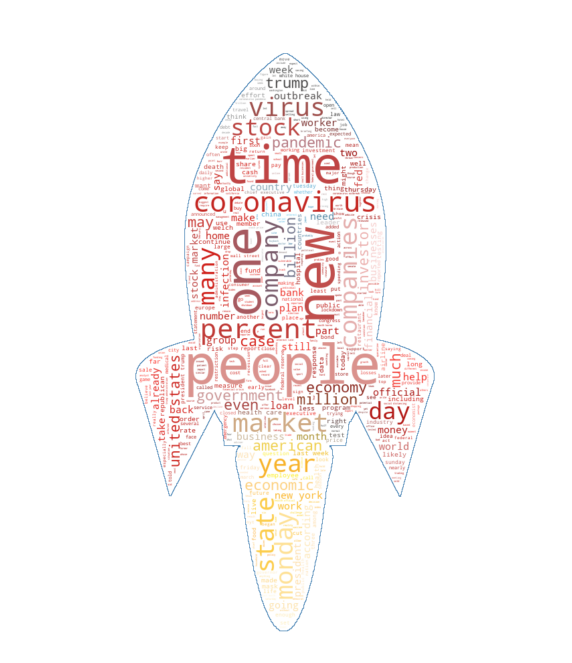

In [46]:
# wordcloud
mask=numpy.array(Image.open("rocket.png"))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=500, mask=mask,
               stopwords=stopwords, contour_width=1, contour_color='steelblue')
wc.generate(cleant2)
image_colors = ImageColorGenerator(mask)


plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('Grenncombined.png')